# Analysis of Results for Urban Expansion

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
with open('/home/pranav-rao/Documents/Remote GIS/Urban-Expansion-Study/results/total_urban_areas.geojson') as f:
    data = json.load(f)

## Processing the data in a proper format

In [9]:
urban_data1 = dict()
for feature in data['features']:
    properties = feature["properties"]
    region = properties["region"].capitalize()
    area = properties["urban_area_sqkm"]
    yr = properties["year"]
    total_area = properties["total_area"]
    urban_percentage = (area / total_area) * 100

    if region not in urban_data1:
        urban_data1[region] = {
            yr: {
                    "urban_area": area,
                    "total_area": total_area,
                    "urban_perc": urban_percentage
                }}
    else:
        urban_data1[region][yr] = {
                    "urban_area": area,
                    "total_area": total_area,
                    "urban_perc": urban_percentage
                }

records = []
for city, year_data in urban_data1.items():
    for year, dic in year_data.items():
        area = dic['urban_area']
        total_area = dic['total_area']
        urban_perc = dic['urban_perc']

        records.append({
            "Year": int(year),
            "City": city,
            "Urban Area (sq km)": area,
            "Total_area (sq km)": total_area,
            "Urban Percentage": urban_perc
        })
df = pd.DataFrame(records).sort_values("City")
df1 = df[['City', 'Urban Area (sq km)', 'Urban Percentage']]

## Displaying the plot

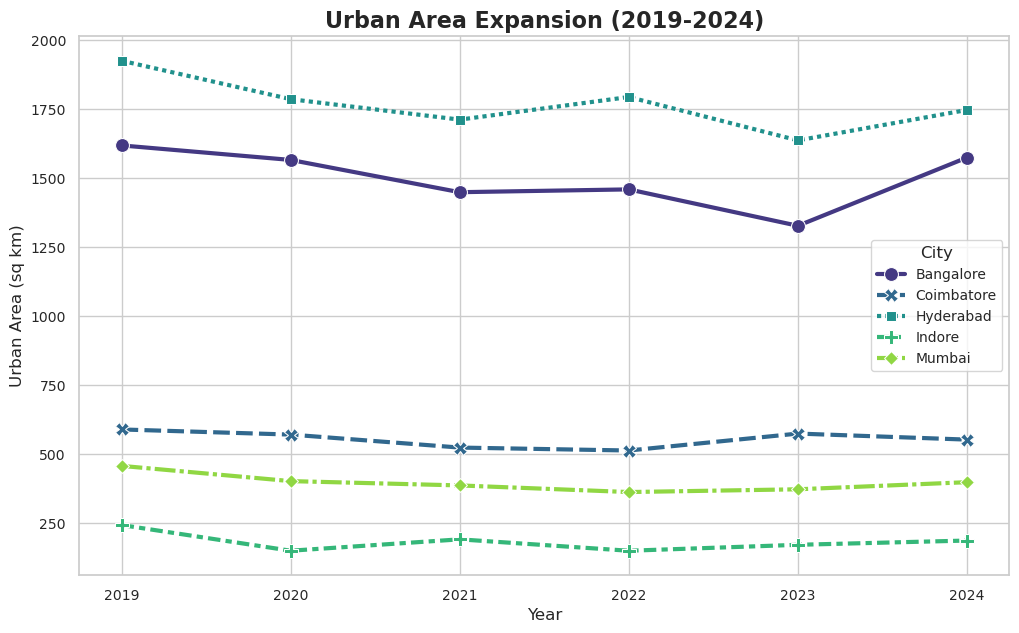

In [88]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))
ax = sns.lineplot(
    data=df,
    x="Year",
    y="Urban Area (sq km)",
    hue="City",
    style="City",
    palette="viridis",
    linewidth=3,
    markers=True,
    markersize=10
)
ax.set_title('Urban Area Expansion (2019-2024)', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Urban Area (sq km)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='City', fontsize=10)
# plt.tight_layout()
plt.savefig('Urban Area Expansion.png', bbox_inches='tight')

To calculate the percent of urban areas per city per year

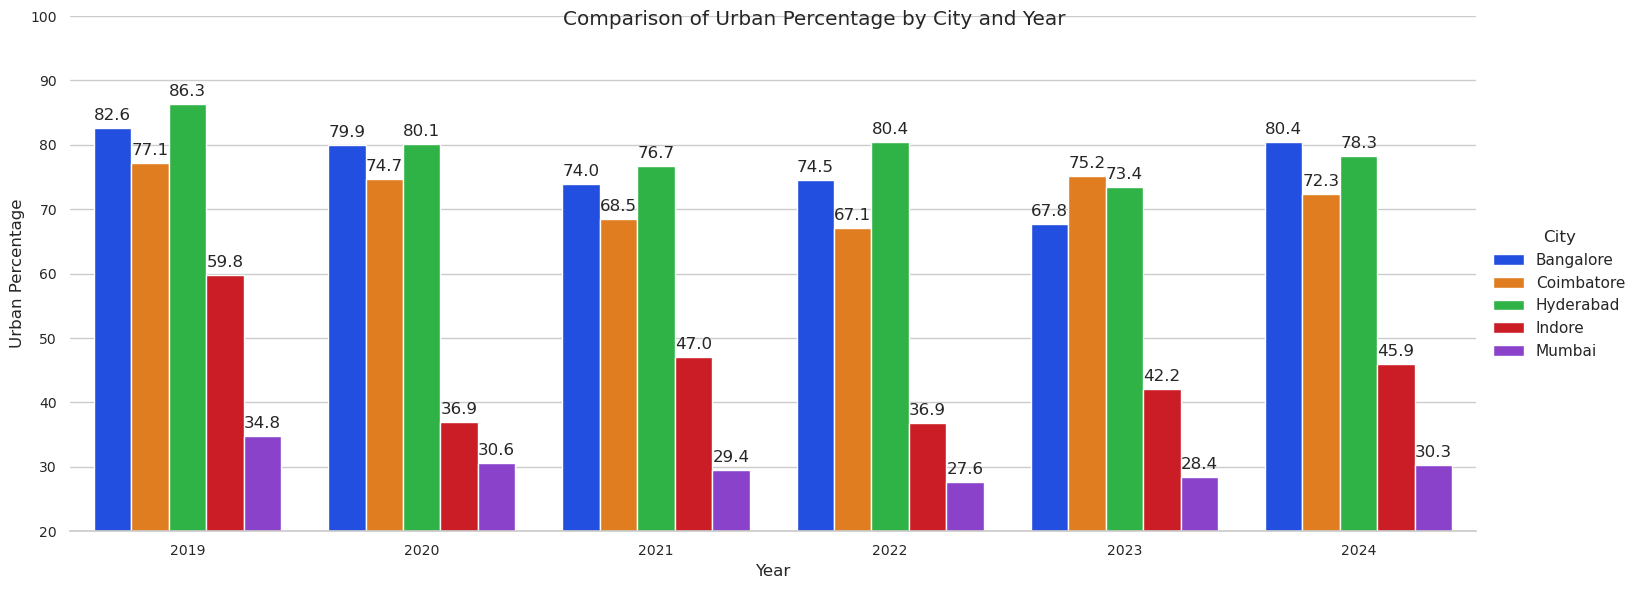

In [86]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="Year", y="Urban Percentage", hue="City",
    palette="bright", alpha=1, height=6, aspect=2.5
)
plt.ylim(20, 100)
for ax in g.axes.flat:
    # Iterate through the bars (patches) in each subplot
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.1f'),  # The text to display, formatted to 4 decimal places
            (p.get_x() + p.get_width() / 2., p.get_height()),  # The (x, y) coordinate for the text
            ha='center',          # Horizontal alignment
            va='center',          # Vertical alignment
            xytext=(0, 9),        # The vertical offset (in points) from the coordinate
            textcoords='offset points'
        )

g.despine(left=True)
g.set_axis_labels("Year", "Urban Percentage")
g.figure.suptitle("Comparison of Urban Percentage by City and Year")
# plt.tight_layout()
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('urban_percentage.png', bbox_inches='tight')

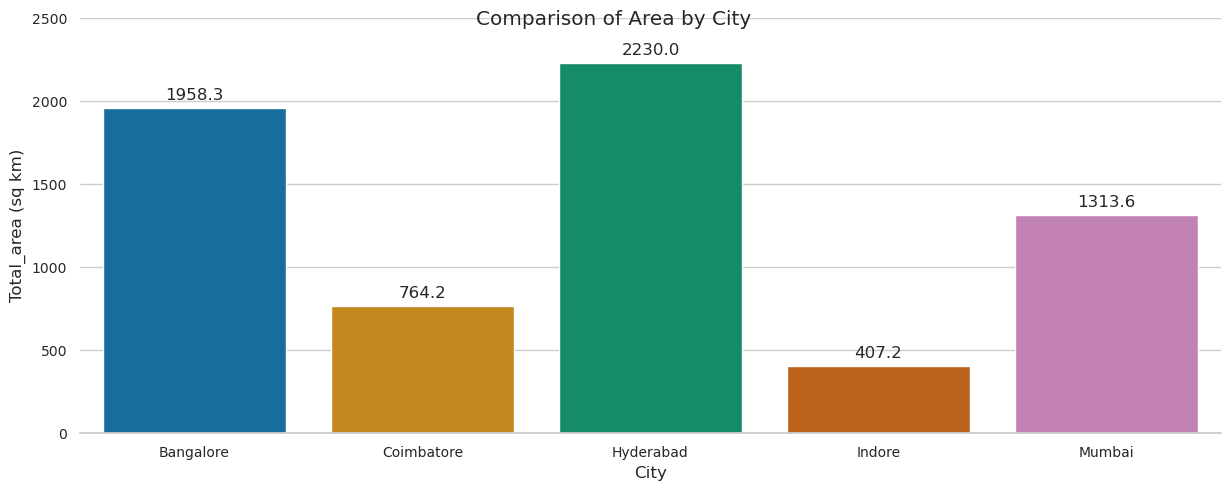

In [85]:
sns.set_theme(style="whitegrid")

g = sns.catplot(
    data=df, kind="bar",
    x="City", y="Total_area (sq km)", hue="City",
    palette="colorblind", alpha=1, height=5, aspect=2.5
)
plt.ylim(0, 2500)
for ax in g.axes.flat:
    # Iterate through the bars (patches) in each subplot
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), '.1f'),  # The text to display, formatted to 4 decimal places
            (p.get_x() + p.get_width() / 2., p.get_height()),  # The (x, y) coordinate for the text
            ha='center',          # Horizontal alignment
            va='center',          # Vertical alignment
            xytext=(0, 9),        # The vertical offset (in points) from the coordinate
            textcoords='offset points'
        )

g.despine(left=True)
g.set_axis_labels("City", "Total_area (sq km)")
g.figure.suptitle("Comparison of Area by City")
# plt.tight_layout()
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.savefig('total_area.png', bbox_inches='tight')

box plot of urban percentages and urban area per city

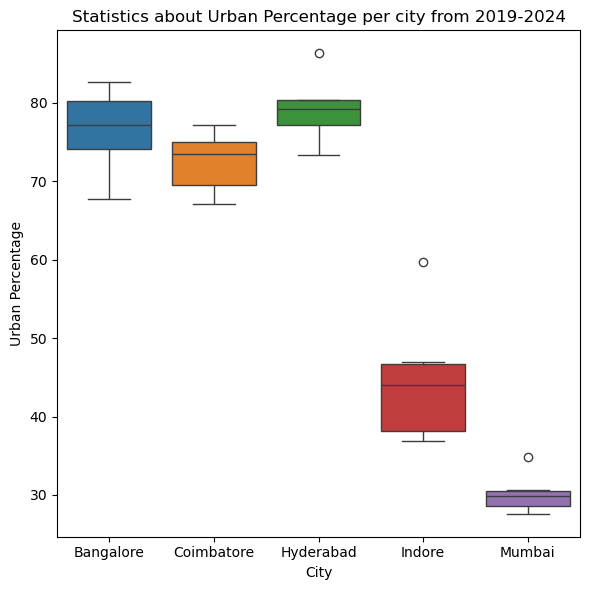

In [27]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='City', y='Urban Percentage', hue='City', orient='v')
plt.title('Statistics about Urban Percentage per city from 2019-2024')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

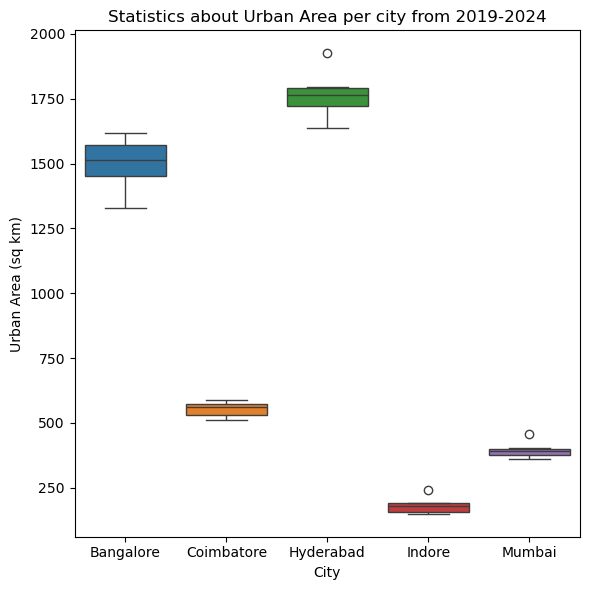

In [24]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x='City', y='Urban Area (sq km)', hue='City')
plt.title('Statistics about Urban Area per city from 2019-2024')
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()